# Gaussian Process


## dataset
1차원의 input과 1차원의 output을 갖는 sin function random data를 100개 생성한다. (without noise model)

In [1]:
import numpy as np
from sklearn import datasets
data_x, data_y = datasets.make_regression(n_samples=50, n_features=1, noise=.0)
y_min_max = (np.max( data_y ) - np.min( data_y ))
#data_y = np.sin( data_y / y_min_max * np.pi * 2.0 )
data_y = (np.sin( data_x ) + 0.5).T[0]

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


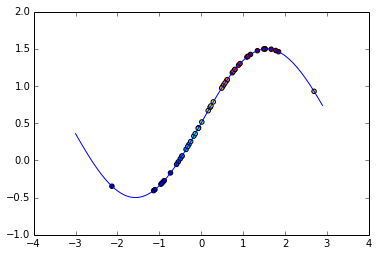

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-3.0, 3.0, 0.1)

fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot( x, np.sin(x) + 0.5 )
axis.scatter(data_x, data_y, c=data_y)

## RBF convariance function


In [3]:
def k(x1, x2, alpha=1.0, ell=1.0):
    d = x1 - x2
    
    return alpha * np.exp( - np.dot(d, d) / ell )

## Gaussian Process without noise


In [4]:
def GP(train_x, train_y, test_x):
    # for train
    mu = np.mean( train_y )
    K = np.array( [[k(x, y) for y in train_x] for x in train_x] )

    # for test
    K_star_star = np.array( [[k(x, y) for y in test_x] for x in test_x] )
    K_star = np.array( [[k(x, y) for y in test_x] for x in train_x])
    
    t = np.matmul( K_star.T, np.linalg.inv(K) )
    mu_star = mu + np.matmul(t, (train_y-mu) )
    sigma_star = K_star_star - np.matmul( t, K_star )
    
    return mu_star, sigma_star

In [5]:
train_x, train_y = data_x[:2], data_y[:2]
prediction = GP(train_x, train_y, x)
prediction_mean = prediction[0]
prediction_stddev = np.diagonal( prediction[1] )

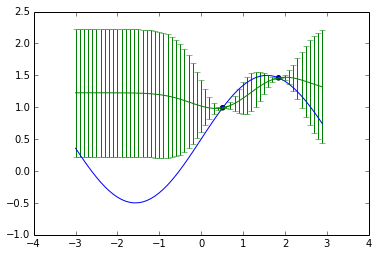

In [6]:
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot( x, np.sin(x) + 0.5 )
axis.errorbar(x, prediction_mean, prediction_stddev)
axis.scatter(train_x, train_y)


In [7]:
train_x, train_y = data_x[:10], data_y[:10]
prediction = GP(train_x, train_y, x)
prediction_mean = prediction[0]
prediction_stddev = np.diagonal( prediction[1] )

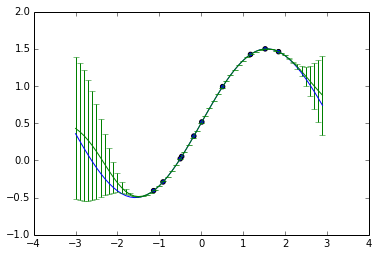

In [8]:
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot( x, np.sin(x) + 0.5)
axis.errorbar(x, prediction_mean, prediction_stddev)
axis.scatter(train_x, train_y)

In [9]:
train_x, train_y = data_x, data_y

In [10]:
prediction = GP(train_x, train_y, x)
prediction_mean = prediction[0]
prediction_stddev = np.diagonal( prediction[1] )

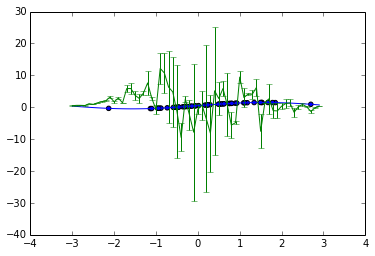

In [11]:
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot( x, np.sin(x) + 0.5 )
axis.errorbar(x, prediction_mean, prediction_stddev)
axis.scatter(train_x, train_y)